**ESAME DI FINE MODULO 3 PYTHON - REGNOTTO FRANCESCA**

_PROGETTO DI ANALISI DATI_

*
1. Verificare le dimensioni del dataset e i relativi metadati 

2. Si chiede di trovare, per ogni continente: 
    a. il numero di casi fin dall'inizio della pandemia 
    b. la percentuale rispetto al totale mondiale del numero di casi 

3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
   a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
   b. il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni
4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
   a. scrivere un breve commento a riguardo
5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
   a. mostrare la somma dei pazienti ospitalizzati per ognuna
   b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

*

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
covid = pd.read_csv("/Users/francescaregnotto/Downloads/owid-covid-data.csv")

1. Verificare le dimensioni del dataset e i relativi metadati

In [5]:
covid.shape

(429435, 67)

Il database contiene 429435 righe e 67 colonne. I nomi delle 67 colonne sono i seguenti:

In [7]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Per avere un'idea dei dati sia all'inizio che alla fine del database, mostro le prime e ultime 5 righe:

In [9]:
covid.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [10]:
covid.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429434,ZWE,Africa,Zimbabwe,2024-08-04,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


La funzione describe mi mostra i principali descrittori statistici delle variabili numeriche del database:

In [12]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


2. Si chiede di trovare, per ogni continente: 

* il numero di casi fin dall'inizio della pandemia:

In [14]:
filtro = ["new_cases", "date", "continent"]
covid_filt = covid.loc[:, filtro] 
covid_cf = covid_filt.groupby("continent")["new_cases"].sum().reset_index()
covid_cf.head()

,continent,new_cases
0,Africa,13146831.0
1,Asia,301564180.0
2,Europe,252916868.0
3,North America,124492698.0
4,Oceania,15003468.0


* La percentuale rispetto al totale mondiale del numero di casi:

In [16]:
covid_totglobe = covid["new_cases"].sum() 
covid_totglobe
covid_cont = covid.groupby("continent")["new_cases"].sum().reset_index()
covid_cont
covid_cont["percentage"] = (covid_cont["new_cases"]/covid_totglobe)*100
covid_cont.head()

,continent,new_cases,percentage
0,Africa,13146831.0,0.399795
1,Asia,301564180.0,9.170566
2,Europe,252916868.0,7.691201
3,North America,124492698.0,3.785823
4,Oceania,15003468.0,0.456255


3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 

In [18]:
covid["date"] = pd.to_datetime(covid["date"])
covid_it22 = covid[(covid["location"] == "Italy") & (covid["date"].dt.year == 2022)]
covid_it22.shape

(365, 67)

In [19]:
covid_it22.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186002,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.3,12.99,8.06,2849.4834
186004,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186005,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186006,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


In [20]:
covid_it22.describe()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,365,3.650000e+02,3.650000e+02,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,3.650000e+02,0.0,3.650000e+02,3.650000e+02,3.650000e+02,365.0,52.000000,52.000000,52.000000,52.000000
mean,2022-07-01 23:59:59.999999744,1.820560e+07,5.325499e+04,53355.805449,166817.619178,130.515068,130.901044,305365.228110,893.253786,894.944756,...,2.780000e+01,NaN,3.180000e+00,8.351000e+01,8.920000e-01,59037472.0,200493.998269,12.394038,11.310192,3396.046452
min,2022-01-01 00:00:00,5.622431e+06,0.000000e+00,15806.286000,136530.000000,0.000000,37.571000,94305.860000,0.000000,265.121000,...,2.780000e+01,NaN,3.180000e+00,8.351000e+01,8.920000e-01,59037472.0,168226.300000,12.010000,0.060000,2849.483400
25%,2022-04-02 00:00:00,1.430411e+07,0.000000e+00,27615.000000,158700.000000,0.000000,77.143000,239924.950000,0.000000,463.190000,...,2.780000e+01,NaN,3.180000e+00,8.351000e+01,8.920000e-01,59037472.0,181549.515000,12.227500,7.315000,3075.157375
50%,2022-07-02 00:00:00,1.818492e+07,0.000000e+00,40135.286000,168058.000000,0.000000,109.286000,305018.280000,0.000000,673.195000,...,2.780000e+01,NaN,3.180000e+00,8.351000e+01,8.920000e-01,59037472.0,195370.130000,12.350000,9.535000,3309.256500
75%,2022-10-01 00:00:00,2.228481e+07,0.000000e+00,68150.143000,176867.000000,0.000000,142.857000,373786.400000,0.000000,1143.092000,...,2.780000e+01,NaN,3.180000e+00,8.351000e+01,8.920000e-01,59037472.0,219267.635000,12.495000,12.997500,3714.041800
max,2022-12-31 00:00:00,2.506050e+07,1.268153e+06,181164.714000,184168.000000,2628.000000,375.429000,420343.500000,21270.916000,3038.702000,...,2.780000e+01,NaN,3.180000e+00,8.351000e+01,8.920000e-01,59037472.0,238657.610000,12.990000,36.860000,4042.476800
std,NaN,5.051101e+06,1.669253e+05,39190.624946,12386.819948,390.783143,84.430043,84722.852387,2799.862321,657.350036,...,3.557590e-14,NaN,1.245157e-14,6.403663e-13,3.001717e-15,0.0,20904.111035,0.239036,7.352854,354.082107


a. L'evoluzione dei casi totali dall'inizio alla fine dell'anno (2022)

<Axes: title={'center': 'Evoluzione dei casi totali nel 2022, Italia'}, xlabel='date'>

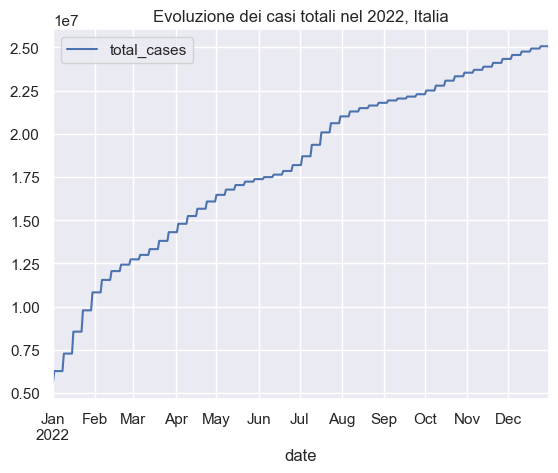

In [22]:
sns.set_theme()
plot_it22 = covid_it22[["total_cases", "date"]].set_index("date")
plot_it22.plot(y="total_cases", title="Evoluzione dei casi totali nel 2022, Italia")

b. il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, 
filtrare via i dati che non hanno misurazioni

<Axes: title={'center': 'Nuovi casi rispetto alla data'}, xlabel='date'>

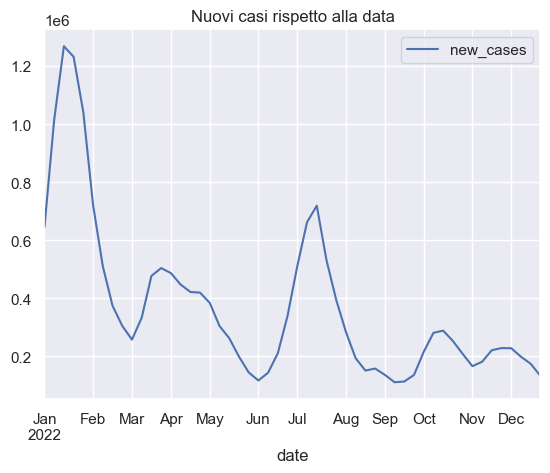

In [24]:
filtro = covid.new_cases!=0
covid_it22clean = covid_it22.loc[filtro]
covid_new22 = covid_it22clean[["new_cases", "date"]]
covid_new22.plot(x= "date", y= "new_cases", title = "Nuovi casi rispetto alla data")

4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)

a. scrivere un breve commento a riguardo



/var/folders/x9/hddp0ntj52q7dhdydsw572zm0000gn/T/ipykernel_8778/1926418065.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_filt["month"] = covid_filt["date"].dt.to_period("M")


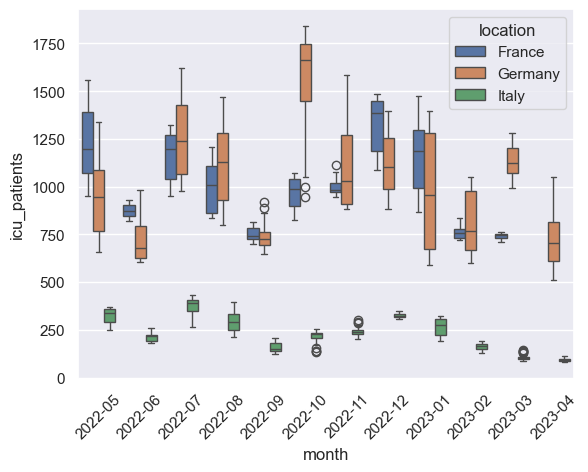

In [216]:
filtro_it = covid["location"]== "Italy"
filtro_de = covid["location"] == "Germany"
filtro_fr = covid["location"] == "France"
filtro_loc = filtro_it | filtro_de | filtro_fr
filtro_y = covid["date"].dt.year.isin([2022, 2023])
filtro_m = (covid["date"].dt.year == 2022) & (covid["date"].dt.month >= 5) | (covid["date"].dt.year == 2023) & (covid["date"].dt.month <= 4)
filtro_icu = covid["icu_patients"].notna()

covid_filt = covid[filtro_loc & filtro_y & filtro_m  & filtro_icu]

covid_filt["month"] = covid_filt["date"].dt.to_period("M") 
covid_filt = covid_filt[["month", "icu_patients", "location"]]  
covid_filt.reset_index(drop = True, inplace = True)

sns.boxplot(data = covid_filt, x="month", y="icu_patients", hue = "location")
plt.xticks(rotation=45)
plt.show()

L'andamento del ricovero di pazienti in terapia intensiva per Francia, Italia, e Germania tra Maggio 2022 e Aprile 2023 non appare lineare. Si nota subito come l'Italia registri numeri minori di ricoveri ICU, mentre la Germania sembra essere il paese che ne registra di più. La Germania sembra raggiungere il picco dei casi tra settembre e ottobre 2022. Per l'Italia questo si verifica a luglio 2022, mentre per la Francia a maggio 2022. Per Francia e Italia, il numero di ricoverati in terapia intensiva sembra diminuire notevolmente a partire da gennaio 2023, mentre per la Germania i valori rimangono ancora elevati. 

5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023: 

    a. mostrare la somma dei pazienti ospitalizzati per ognuna 

    b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno



In [188]:
filtro_it = covid["location"]== "Italy"
filtro_de = covid["location"] == "Germany"
filtro_fr = covid["location"] == "France"
filtro_es = covid["location"] == "Spain"
filtro_loc = filtro_it | filtro_de | filtro_fr | filtro_es
filtro_y = covid["date"].dt.year == 2023

covid23 = covid[filtro_loc & filtro_y].groupby("location")["hosp_patients"].sum()
covid23

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

La Francia sembra avere il maggior numero di pazienti ospitalizzati nel 2023, seguita dall'Italia e dalla Spagna; la Germania sembra non averne. Provo ad osservare questa anomalia:

In [191]:
filtro_it = covid["location"]== "Italy"
filtro_de = covid["location"] == "Germany"
filtro_fr = covid["location"] == "France"
filtro_es = covid["location"] == "Spain"
filtro_loc = filtro_it | filtro_de | filtro_fr | filtro_es
filtro_y = covid["date"].dt.year == 2023

covid23 = covid[filtro_loc & filtro_y].groupby("location")["hosp_patients"].sum(min_count=1)
covid23

location
France     1382574.0
Germany          NaN
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

Ponendo la condizione min_count=1 nella funzione somma, notiamo che questi valori sono nulli. Vediamo quanti valori nulli ci sono effettivamente nella colonna hosp_patients per la Germania:

In [157]:
covid_de = covid[covid["location"] == "Germany"]
covid_de["hosp_patients"].isna().sum()

1674

In [163]:
germany_data = covid[filtro_de & filtro_y]
germany_missing = germany_data["hosp_patients"].isna().sum()
germany_missing

730

Ci sono 730 valori nulli per la colonna "hosp_patients" per la Germania, nel 2023.

In [184]:
germany_data = covid[covid["location"] == "Germany"][["location", "hosp_patients"]]
germany_data.tail()

,location,hosp_patients
142080,Germany,NaN
142081,Germany,NaN
142082,Germany,NaN
142083,Germany,NaN
142084,Germany,NaN


Ho verificato che i valori della colonna hosp_patients per la Germania sono effettivamente tutti nulli. In questo caso, anche sotuituendo i NaN con 0 non sarebbe possibile identificare il numero di pazienti ospitalizzati nel 2023 in Germania.